## SOM neural network project with Fashion MNIST dataset
#### It seems to be a Python-based machine learning project focused on clustering Fashion MNIST dataset images using a Self-Organizing Map (SOM). The notebook likely includes steps for:

- Importing and preprocessing the Fashion MNIST dataset.
- Training a Self-Organizing Map to cluster fashion-related images (e.g., shoes, shirts, etc.).
- Visualizing the clusters or analyzing their effectiveness.

#### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from minisom import MiniSom

#### Load Fashion MNIST dataset

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### Labels Each training and test example is assigned to one of the following labels:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

#### Reshape and normalize

In [5]:
# Flatten images and normalize to [0, 1]
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0   

In [6]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


#### Initialize and Train the SOM

* Define SOM dimensions

In [7]:
# You can adjust these values to change the SOM grid size
som_x, som_y = 20, 20  

In [8]:
# Initialize the SOM with input size = number of features (28x28 = 784)
som = MiniSom(x=som_x, y=som_y, input_len=784, sigma=1.0, learning_rate=0.5)

##### Randomly initialize weights

In [15]:
som.random_weights_init(X_train)

##### Train the SOM

In [10]:
print("Training SOM...")
# You can increase the number of iterations for better convergence
som.train_random(X_train, num_iteration=10000)  
print("Training completed!")

Training SOM...
Training completed!


#### Visualize SOM Clusters

* Create a U-Matrix

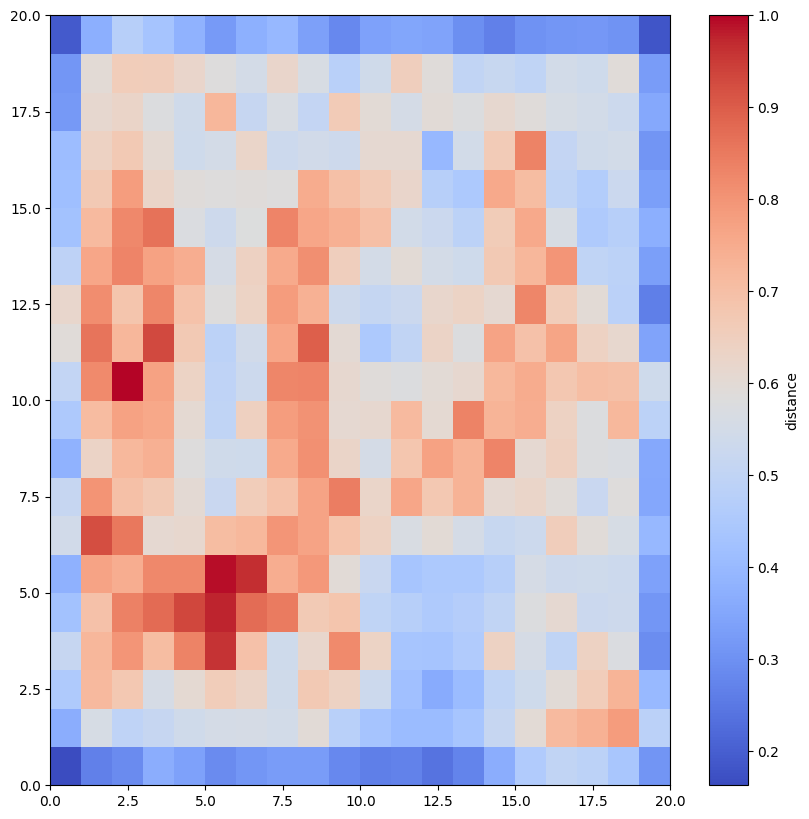

In [11]:
plt.figure(figsize=(10, 10))

# Plot the distance map as a background
plt.pcolor(som.distance_map().T, cmap='coolwarm') 
plt.colorbar(label='distance')

##### Overlay each data point on the U-Matrix with a marker representing its class

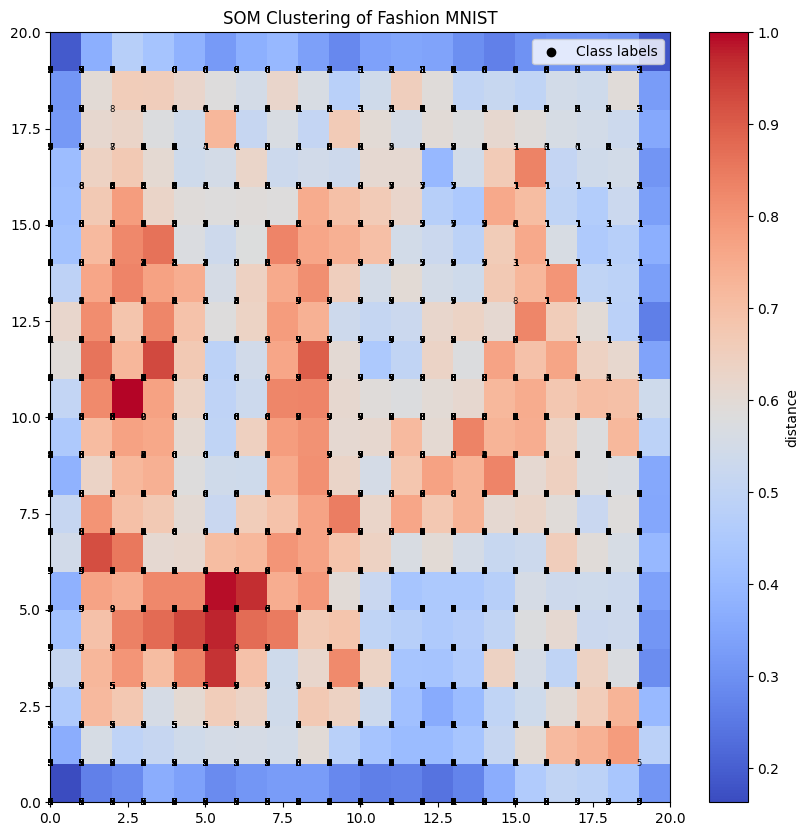

In [12]:
# Display U-Matrix for background
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot the distance map as a background
plt.colorbar(label='distance')

# Mark each node with a colored dot and display class labels
for idx, x in enumerate(X_train):
    winner = som.winner(x)  # Get the winning node
    plt.text(winner[0], winner[1],  # Place text directly on the winning node coordinates
             str(y_train[idx]),     # Display class label
             color='black',
             ha='center',
             va='center',
             fontsize=6)            # Slightly larger font size for visibility

plt.scatter([], [], color='black', label='Class labels')  # Placeholder for legend
plt.title("SOM Clustering of Fashion MNIST")
plt.legend()
plt.show()


#### Analyze the Clusters

In [13]:
from collections import defaultdict

# Map each node to its list of labels
cluster_labels = defaultdict(list)
for idx, x in enumerate(X_train):
    winner = som.winner(x)
    cluster_labels[winner].append(y_train[idx])

# Display the frequency of each label in each cluster
for node, labels in cluster_labels.items():
    print(f"Node {node}: {np.bincount(labels)}")  # Shows count of each class in the cluster

Node (8, 13): [  0   0   0   0   0   1   0   4   0 269]
Node (4, 9): [196   0   0   0   0   0   5]
Node (13, 19): [59 19  1 35  5  0 31]
Node (8, 19): [42  1  0 28  0  0 33]
Node (18, 19): [ 14   3   0 110   0   0   2]
Node (17, 9): [  1   0 161   0  54   0  28]
Node (13, 15): [  0   0   0   0   0   3   0 296   0   1]
Node (16, 8): [ 0  0 62  0 87  0 21]
Node (4, 2): [  0   0   0   0   0 234]
Node (5, 3): [  0   0   0   0   0 138]
Node (6, 18): [90  0  0 28  0  0 56]
Node (1, 6): [  0   0   0   0   0   6   0   0   0 202]
Node (11, 14): [  0   0   0   0   0  42   0 123   1   8]
Node (0, 0): [  0   0   0   0   0 230   0   4]
Node (12, 16): [  0   0   0   0   0   2   0 250]
Node (9, 11): [  0   0   0   0   0   3   0   6   0 179]
Node (16, 13): [  0 161]
Node (6, 11): [113   0   0   3   0   0  14]
Node (3, 7): [ 1  2 55  3 22  0 16  0  3]
Node (13, 3): [  2   2  57   0  81   0 163]
Node (7, 14): [  8   3   0 228   1   0   1]
Node (16, 16): [  0 220]
Node (8, 6): [14  2  5 23 13  0 14  0  2

#### Visualize Prototype Weights

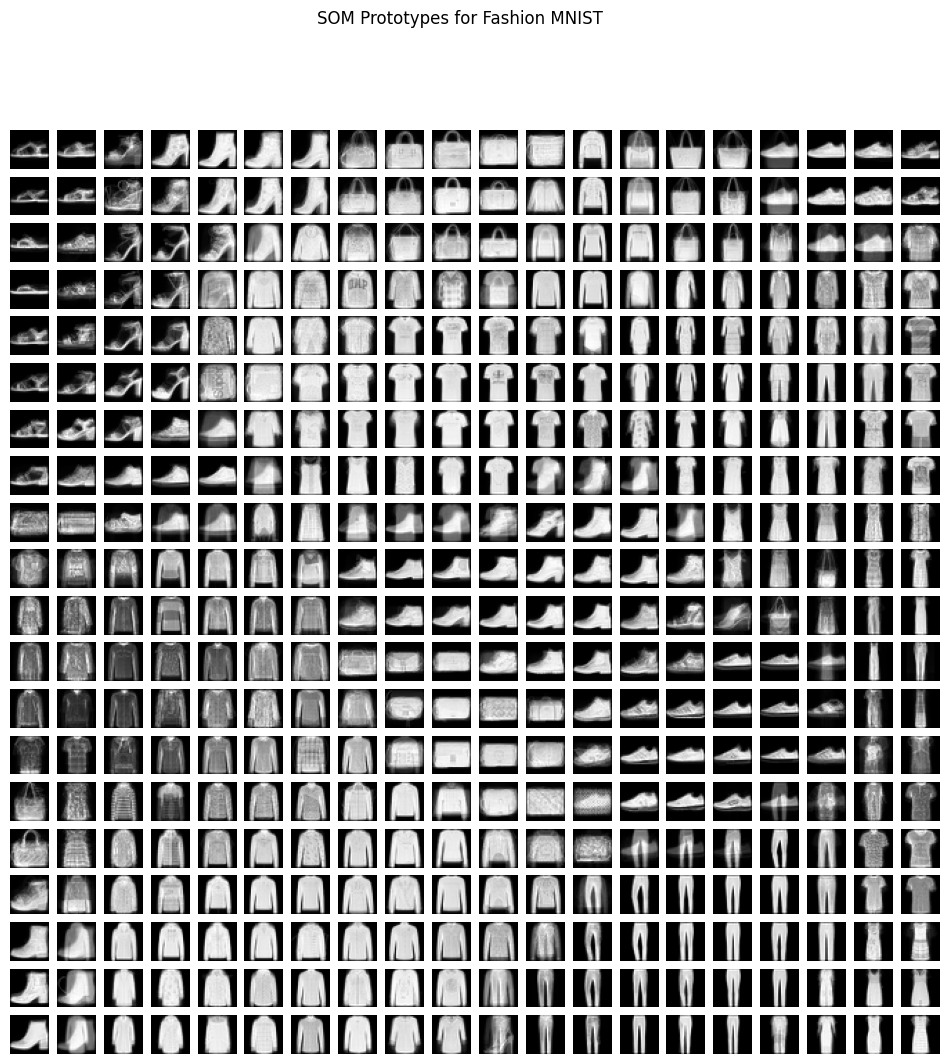

In [14]:
# Plot prototypes for each node
plt.figure(figsize=(12, 12))
for i in range(som_x):
    for j in range(som_y):
        plt.subplot(som_x, som_y, i * som_y + j + 1)
        plt.imshow(som.get_weights()[i, j].reshape(28, 28), cmap='gray')
        plt.axis('off')

plt.suptitle("SOM Prototypes for Fashion MNIST")
plt.show()